In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset
train = pd.read_csv('../data/tree_train.csv')
valid = pd.read_csv('../data/tree_valid.csv')
test = pd.read_csv('../data/tree_test.csv')

# attach train and valid
train = pd.concat([train, valid], axis=0)
train.head()

,Unnamed: 0,spacegroup,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1462,206,0.1875,0.2500,0.5625,9.8238,9.8237,9.8238,90.0019,90.0020,89.9976,0.1833,1.3345
1,19,12,0.2500,0.2500,0.5000,12.2649,3.1889,6.3388,90.0000,105.0943,90.0001,0.2063,1.5596
2,970,206,0.6250,0.3750,0.0000,9.1418,9.1413,9.1413,90.0039,90.0043,89.9967,0.1051,3.6341
3,214,194,0.6875,0.3125,0.0000,6.1650,6.1648,23.5817,90.0177,89.9981,120.0032,0.2311,3.1668
4,2217,33,0.9062,0.0312,0.0625,9.8901,8.4916,9.1232,90.0055,90.0023,90.0012,0.1067,4.0881


In [12]:
# Create features and labels & split training/crossvalidation/testing set

# list all features and labels
features = ['spacegroup', 'percent_atom_al', 'percent_atom_ga', 'percent_atom_in', 
            'lattice_vector_1_ang', 'lattice_vector_2_ang', 'lattice_vector_3_ang', 'lattice_angle_alpha_degree',
            'lattice_angle_beta_degree', 'lattice_angle_gamma_degree']
labels = ['formation_energy_ev_natom', 'bandgap_energy_ev']

xtrain = np.array(train[features])
ytrain = np.array(train[labels])
xtest  = np.array(test[features])
ytest  = np.array(test[labels])

# check the shape
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(1920, 10) (1920, 2) (480, 10) (480, 2)


In [4]:
# Training

# import models
from sklearn.ensemble import RandomForestRegressor

# initialize a random forest algorithm
rf = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=42)

# fit to training data
rf.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [5]:
# evaluate performance
print(rf.feature_importances_)

# training
print('###training###\n', 'score:', rf.score(xtrain, ytrain))
# test
print('###testing###\n', 'score:', rf.score(xtest, ytest))
ypred = rf.predict(xtest)

def rmsle(pred,target):
    return np.sqrt(np.square(np.log(pred + 1) - np.log(target + 1)).mean())

err = rmsle(ypred, ytest)
print('RMLSE:', err)

[0.01784604 0.53071217 0.10986013 0.0767838  0.0322058  0.16057798
 0.02033427 0.02728639 0.02439342]
###training###
 score: 0.97833361142404
###testing###
 score: 0.9469718079023872
RMLSE: 0.06887597075107584


In [5]:
# validation
from sklearn.model_selection import cross_val_score

scr = []
for j in range(10):
    n_trees = 500
    rf = RandomForestRegressor(n_estimators=n_trees, max_depth=j+1, random_state=42)
    scores = cross_val_score(rf, xtrain, ytrain, cv=5)
    scr.append(scores.mean())



[0.5263928216008465,
 0.6936513726190567,
 0.8173275337691207,
 0.8792725158769482,
 0.9116917070431496,
 0.9278575069397876,
 0.9352943569970286,
 0.9384786431648259,
 0.9394456690571034,
 0.9393969344721398]

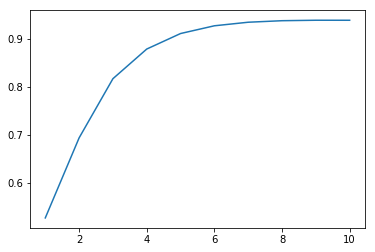

In [10]:
depth = np.arange(1,11)
plt.plot(depth, scr)
scr

In [ ]:
from sklearn.model_selection import cross_val_score

scr = []
for j in range(10):
    depth = 9
    rf = RandomForestRegressor(n_estimators=n_trees, max_depth=9, random_state=42)
    scores = cross_val_score(rf, xtrain, ytrain, cv=5)
    scr.append(scores.mean())


In [7]:
fin_test = pd.read_csv('../data/official_test.csv')
fin_test.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001


In [8]:
final_test  = np.array(fin_test[features])
rf = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=42)
rf.fit(xtrain,ytrain)
final_pred = rf.predict(final_test)

In [9]:
d = {labels[0]:final_pred[:,0], labels[1]:final_pred[:,1]}
final = pd.DataFrame(data=d)
submission = final.to_csv('submission.csv')

In [10]:
# initialize a random forest algorithm
rf1 = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=42)

# fit to training data
rf1.fit(xtrain,ytrain[:,0])

rf2 = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=42)
rf2.fit(xtrain,ytrain[:,1])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [11]:
y1 = rf1.predict(xtest)
y2 = rf2.predict(xtest)
err1 = rmsle(y1, ytest[:,0])
err2 = rmsle(y2, ytest[:,1])
print(err1, err2)

0.03269456399667549 0.09122147356569124


In [15]:
rf.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1608637542, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1273642419, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1935803228, splitter='best'),
 DecisionTreeRegressor(crite

In [18]:
from sklearn import tree
t = tree.DecisionTreeRegressor()
t = t.fit(xtrain,ytrain)
tree.export_graphviz(t, out_file='tree.dot')